# Analyse the Popularity of Different Programming Languages over Time

In [227]:
import pandas as pd

## Data Exploration

Read the .csv file and store it in a Pandas dataframe

In [228]:
df = pd.read_csv('QueryResults.csv', names=['Date', 'Tag', 'Post'], header=0)

In [229]:
df.head()

,Date,Tag,Post
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,505
4,2008-08-01 00:00:00,c++,164


In [230]:
df.shape

(2510, 3)

In [231]:
df.count()

Date    2510
Tag     2510
Post    2510
dtype: int64

Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [232]:
df.groupby('Tag', as_index=False).sum()

C:\Users\DSMSD\AppData\Local\Temp\ipykernel_19712\1510963965.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Tag', as_index=False).sum()


,Tag,Post
0,assembly,43201
1,c,398787
2,c#,1600424
3,c++,798213
4,delphi,51189
5,go,70553
6,java,1904723
7,javascript,2508682
8,perl,67806
9,php,1460946


How many months of data exist per language? Which language had the fewest months with an entry? 

In [233]:
df.groupby('Tag').count()

,Date,Post
Tag,,
assembly,181,181
c,181,181
c#,182,182
c++,181,181
delphi,181,181
go,166,166
java,181,181
javascript,181,181
perl,181,181


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [234]:
print(type(df.Date[1]))
df.Date[1]

<class 'str'>


'2008-08-01 00:00:00'

In [235]:
pd.to_datetime(df.Date[1])

Timestamp('2008-08-01 00:00:00')

In [236]:
df.Date = pd.to_datetime(df.Date)
df.head()

,Date,Tag,Post
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,505
4,2008-08-01,c++,164


## Data Manipulation



In [237]:
df.head()

,Date,Tag,Post
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,505
4,2008-08-01,c++,164


What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [238]:
reshaped_df = df.pivot(index='Date', columns='Tag', values='Post')
reshaped_df.head()

Tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,505.0,164.0,14.0,NaN,222.0,163.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1641.0,754.0,104.0,NaN,1129.0,634.0,130.0,475.0,537.0,6.0,286.0,NaN
2008-10-01,16.0,302.0,1988.0,807.0,112.0,NaN,1149.0,722.0,128.0,610.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1731.0,734.0,141.0,NaN,955.0,580.0,97.0,499.0,449.0,1.0,157.0,NaN


In [239]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='Tag')

In [240]:
reshaped_df.shape

(182, 14)

Count the number of entries per programming language. Why might the number of entries be different? 

In [220]:
reshaped_df.count()

Tag
assembly      181
c             181
c#            182
c++           181
delphi        181
go            166
java          181
javascript    181
perl          181
php           181
python        181
r             179
ruby          181
swift         173
dtype: int64

In [221]:
reshaped_df.fillna(0, inplace=True)
reshaped_df.head()

Tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,505.0,164.0,14.0,0.0,222.0,163.0,28.0,158.0,120.0,0.0,70.0,0.0
2008-09-01,28.0,320.0,1641.0,754.0,104.0,0.0,1129.0,634.0,130.0,475.0,537.0,6.0,286.0,0.0
2008-10-01,16.0,302.0,1988.0,807.0,112.0,0.0,1149.0,722.0,128.0,610.0,506.0,0.0,247.0,0.0
2008-11-01,16.0,258.0,1731.0,734.0,141.0,0.0,955.0,580.0,97.0,499.0,449.0,1.0,157.0,0.0


In [222]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

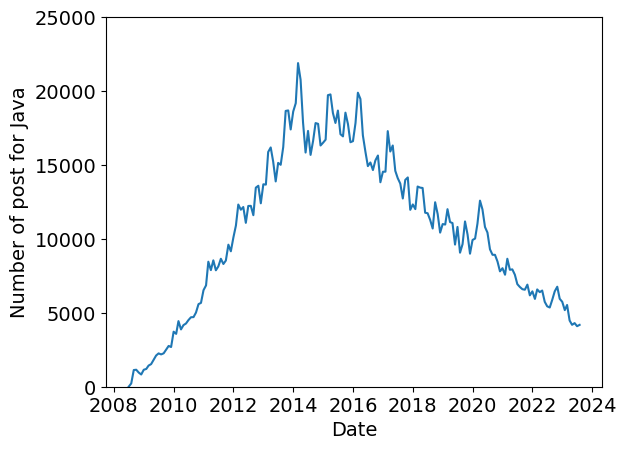

In [223]:
from matplotlib import pyplot as plt
plt.Figure(figsize=(16, 10), dpi=200)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Number of post for Java', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylim((0, 25000))
plt.plot(reshaped_df.index, reshaped_df.java,)
plt.show()

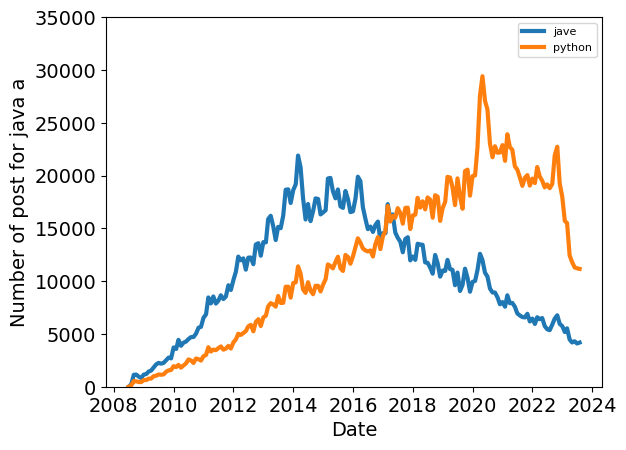

In [224]:
plt.Figure(figsize=(16, 10), dpi=200)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Number of post for java a', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylim((0, 35000))
plt.plot(reshaped_df.index, reshaped_df.java, linewidth=3, label='jave')
plt.plot(reshaped_df.index, reshaped_df.python, linewidth=3, label='python')

plt.legend(fontsize=8)
plt.show()

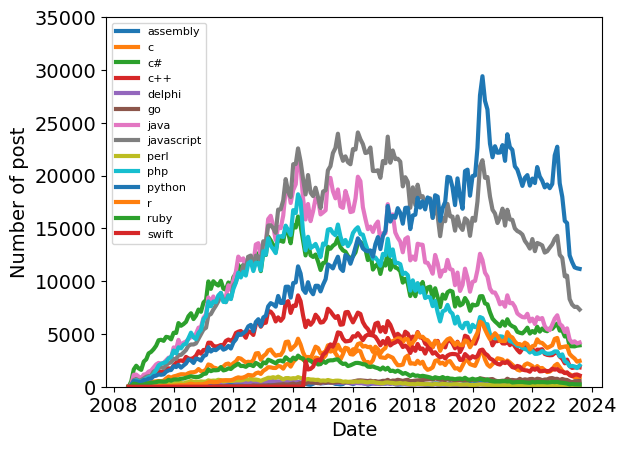

In [225]:
for colnames in reshaped_df.columns:
    plt.Figure(figsize=(16, 10), dpi=200)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylabel('Number of post', fontsize=14)
    plt.xlabel('Date', fontsize=14)
    plt.ylim((0, 35000))
    plt.plot(
        reshaped_df.index, 
        reshaped_df[colnames],
        linewidth=3,
        label=reshaped_df[colnames].name
        )
plt.legend(fontsize=8)
plt.show()
    

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

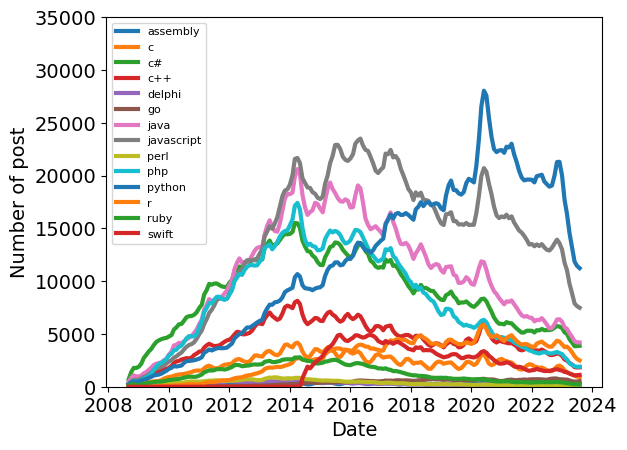

In [190]:
roll_df = reshaped_df.rolling(window=3).mean()
for colnames in reshaped_df.columns:
    plt.Figure(figsize=(16, 10), dpi=200)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylabel('Number of post', fontsize=14)
    plt.xlabel('Date', fontsize=14)
    plt.ylim((0, 35000))
    plt.plot(
        roll_df.index, 
        roll_df[colnames],
        linewidth=3,
        label=roll_df[colnames].name
        )
plt.legend(fontsize=8)
plt.show()

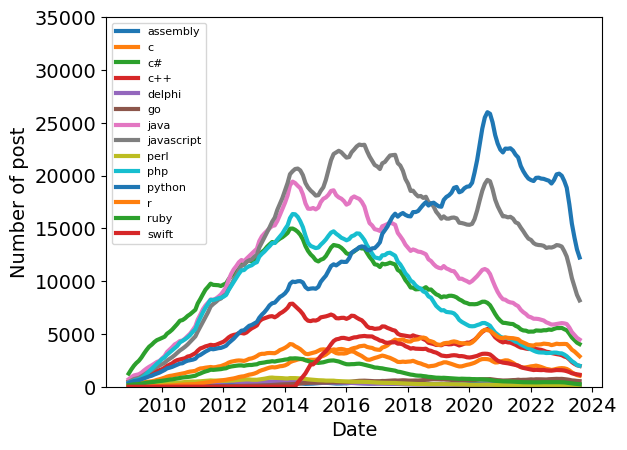

In [191]:
roll_df = reshaped_df.rolling(window=6).mean()
for colnames in reshaped_df.columns:
    plt.Figure(figsize=(16, 10), dpi=200)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylabel('Number of post', fontsize=14)
    plt.xlabel('Date', fontsize=14)
    plt.ylim((0, 35000))
    plt.plot(
        roll_df.index, 
        roll_df[colnames],
        linewidth=3,
        label=roll_df[colnames].name
        )
plt.legend(fontsize=8)
plt.show()

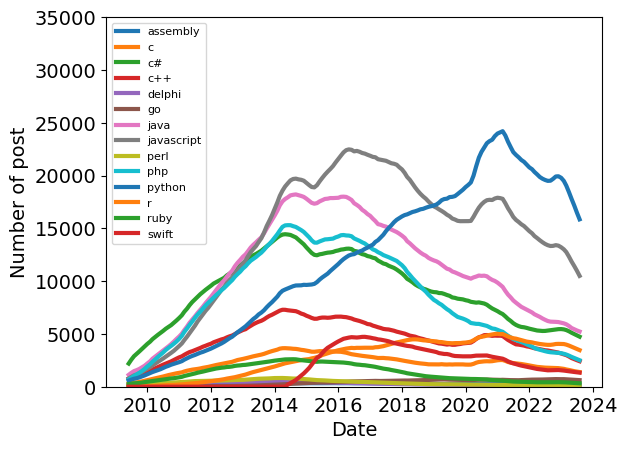

In [184]:
roll_df = reshaped_df.rolling(window=12).mean()
for colnames in reshaped_df.columns:
    plt.Figure(figsize=(16, 10), dpi=200)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylabel('Number of post', fontsize=14)
    plt.xlabel('Date', fontsize=14)
    plt.ylim((0, 35000))
    plt.plot(
        roll_df.index, 
        roll_df[colnames],
        linewidth=3,
        label=roll_df[colnames].name
        )
plt.legend(fontsize=8)
plt.show()